# Decision Trees

#### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib
from dmba import plotDecisionTree
%matplotlib inline

# Set random seed variable for code reproducibility
SEED = 0

### Example 1: Lecture

**Create a dataframe for the `RidingMowers.csv` data**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


**Create a scatterplot for Income and Lot Size with Ownership as the Color**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

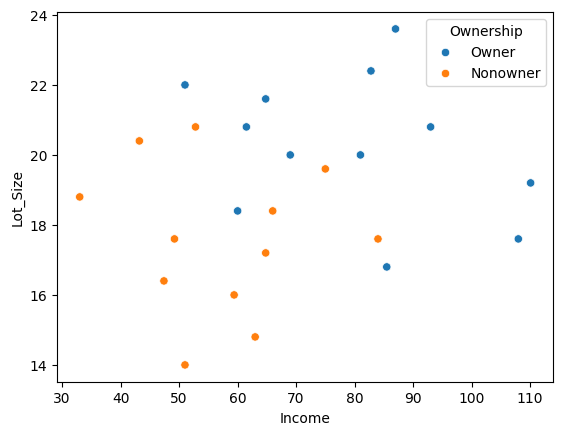

**Calculate Gini Index for First Split Condition**

Helper function provided for Gini index

In [4]:
def gini_index(x):
    unique_labels, counts = np.unique(x, return_counts=True)
    probabilities = counts / len(x)
    gini = 1 - np.sum(probabilities**2)
    return (counts, gini)

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

In [5]:
split_value = 
split_condition = 

split_true = 
split_false = 

print(f"Left Split: Income <= {split_value}, Gini Index = {gini_index(split_true)[1]:.3f}")
print(f"Right Split: Income > {split_value}, Gini Index = {gini_index(split_false)[1]:.3f}")

Left Split: Income <= 59.7, Gini Index = 0.219
Right Split: Income > 59.7, Gini Index = 0.430


**Calculate Entropy for First Split Condition**

Helper function provided for Entropy

In [6]:
def entropy_loss(x):
    unique_labels, counts = np.unique(x, return_counts=True)
    probabilities = counts / len(x)
    entropy_loss = entropy(probabilities, base=2)
    return (counts, entropy_loss)

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

In [7]:
print(f"Left Split: Income <= {split_value}, Entropy = {entropy_loss(split_true)[1]:.3f}")
print(f"Right Split: Income > {split_value}, Entropy = {entropy_loss(split_false)[1]:.3f}")

Left Split: Income <= 59.7, Entropy = 0.544
Right Split: Income > 59.7, Entropy = 0.896


**Calculate Overall Gini and Entropy for First Split Condition**

Helper function provided for Weighted Calculation

<h4 style="color:blue"> Write Your Code Below: </h4>

In [8]:
def weighted_impurity(cond_t, cond_f, samples, criteria):
    if criteria == 'gini':
        imp_t = gini_index(cond_t)
        imp_f = gini_index(cond_f)
    elif criteria == 'entropy':
        imp_t = entropy_loss(cond_t)
        imp_f = entropy_loss(cond_f)
    w_imp_t = sum(imp_t[0]) / len(samples) * imp_t[1]
    w_imp_f = sum(imp_f[0]) / len(samples) * imp_f[1]
    return w_imp_t + w_imp_f

<h3 style="color:teal"> Expected Output: </h3>

In [9]:
print(f"Combined Gini for Income Split on {split_value} is {weighted_impurity(split_true, split_false, mowers_df['Income'], 'gini'):.3f}")
print(f"Combined Entropy for Income Split on {split_value} is {weighted_impurity(split_true, split_false, mowers_df['Income'], 'entropy'):.3f}")

Combined Gini for Income Split on 59.7 is 0.359
Combined Entropy for Income Split on 59.7 is 0.779


**Create Decision Tree with a Depth of 2**

Use Gini for splitting criteria and display impurity value on nodes.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

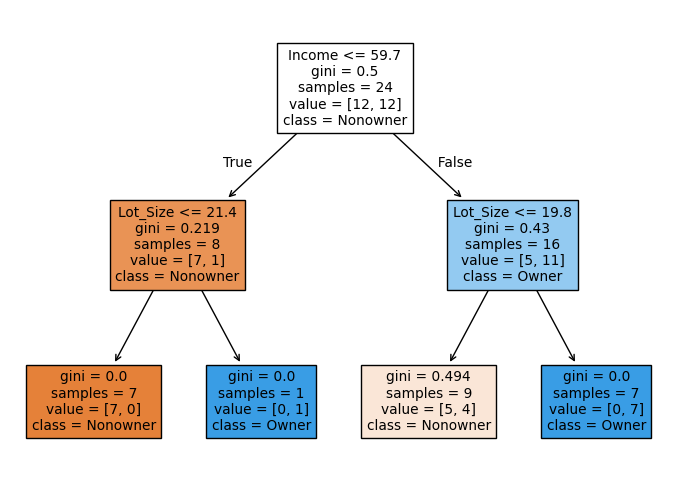

**Create Full Decision Tree**

Use Gini for splitting criteria and display impurity value on nodes.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

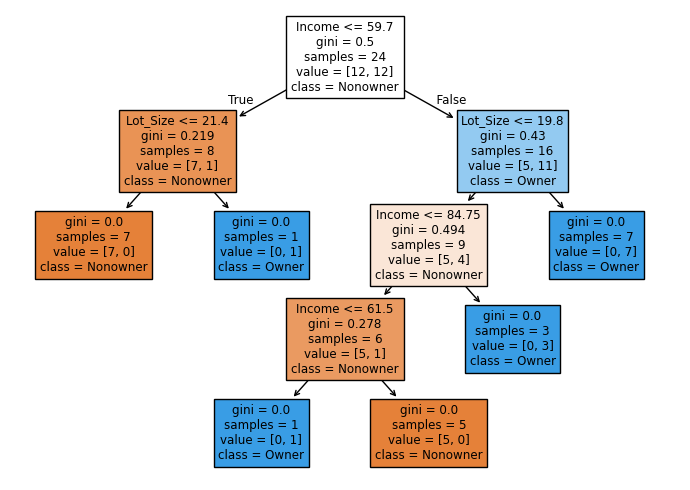

### Example 2: Lecture

**Create a dataframe for the `UniversalBank.csv` data**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Create crosstab summaries of the `Securities Account`, `CD Account`, `CreditCard` variables.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60


Personal Loan,0,1
CD Account,,
0,4358,340
1,162,140


Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


**Calculate overall impurity for `Securities Account`, `CD Account`, `CreditCard` variables.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

In [16]:
vs = ['Securities Account', 'CD Account', 'CreditCard']
for var in vs:
    split_condition = 

    split_true = 
    split_false = 

    sa = 
    print(f"Combined Gini for {var} Split is {sa:.3f}")

Combined Gini for Securities Account Split is 0.173
Combined Gini for CD Account Split is 0.156
Combined Gini for CreditCard Split is 0.174


**Create Decision Tree with a Depth of 2 with only the Securities Account, CD Account, CreditCard variables.**

Use Gini for splitting criteria and display impurity value on nodes.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

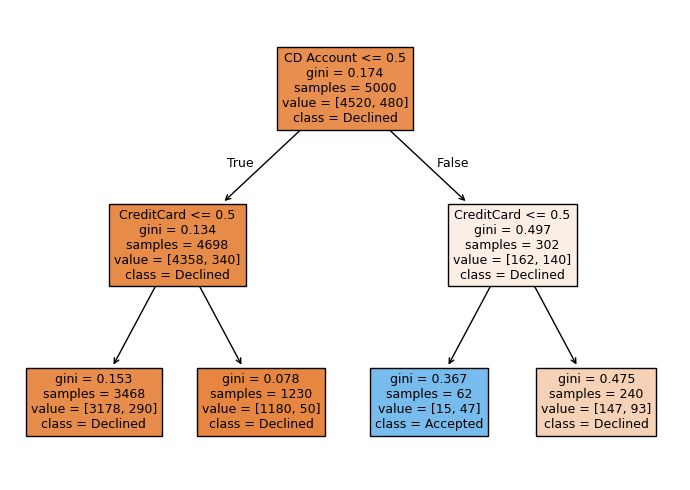

**Create a fully developed Decision Tree with all variables except for `ID` and `Zip Code`.**

Use Gini for splitting criteria and use dmba plotDecisionTree to display the tree.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

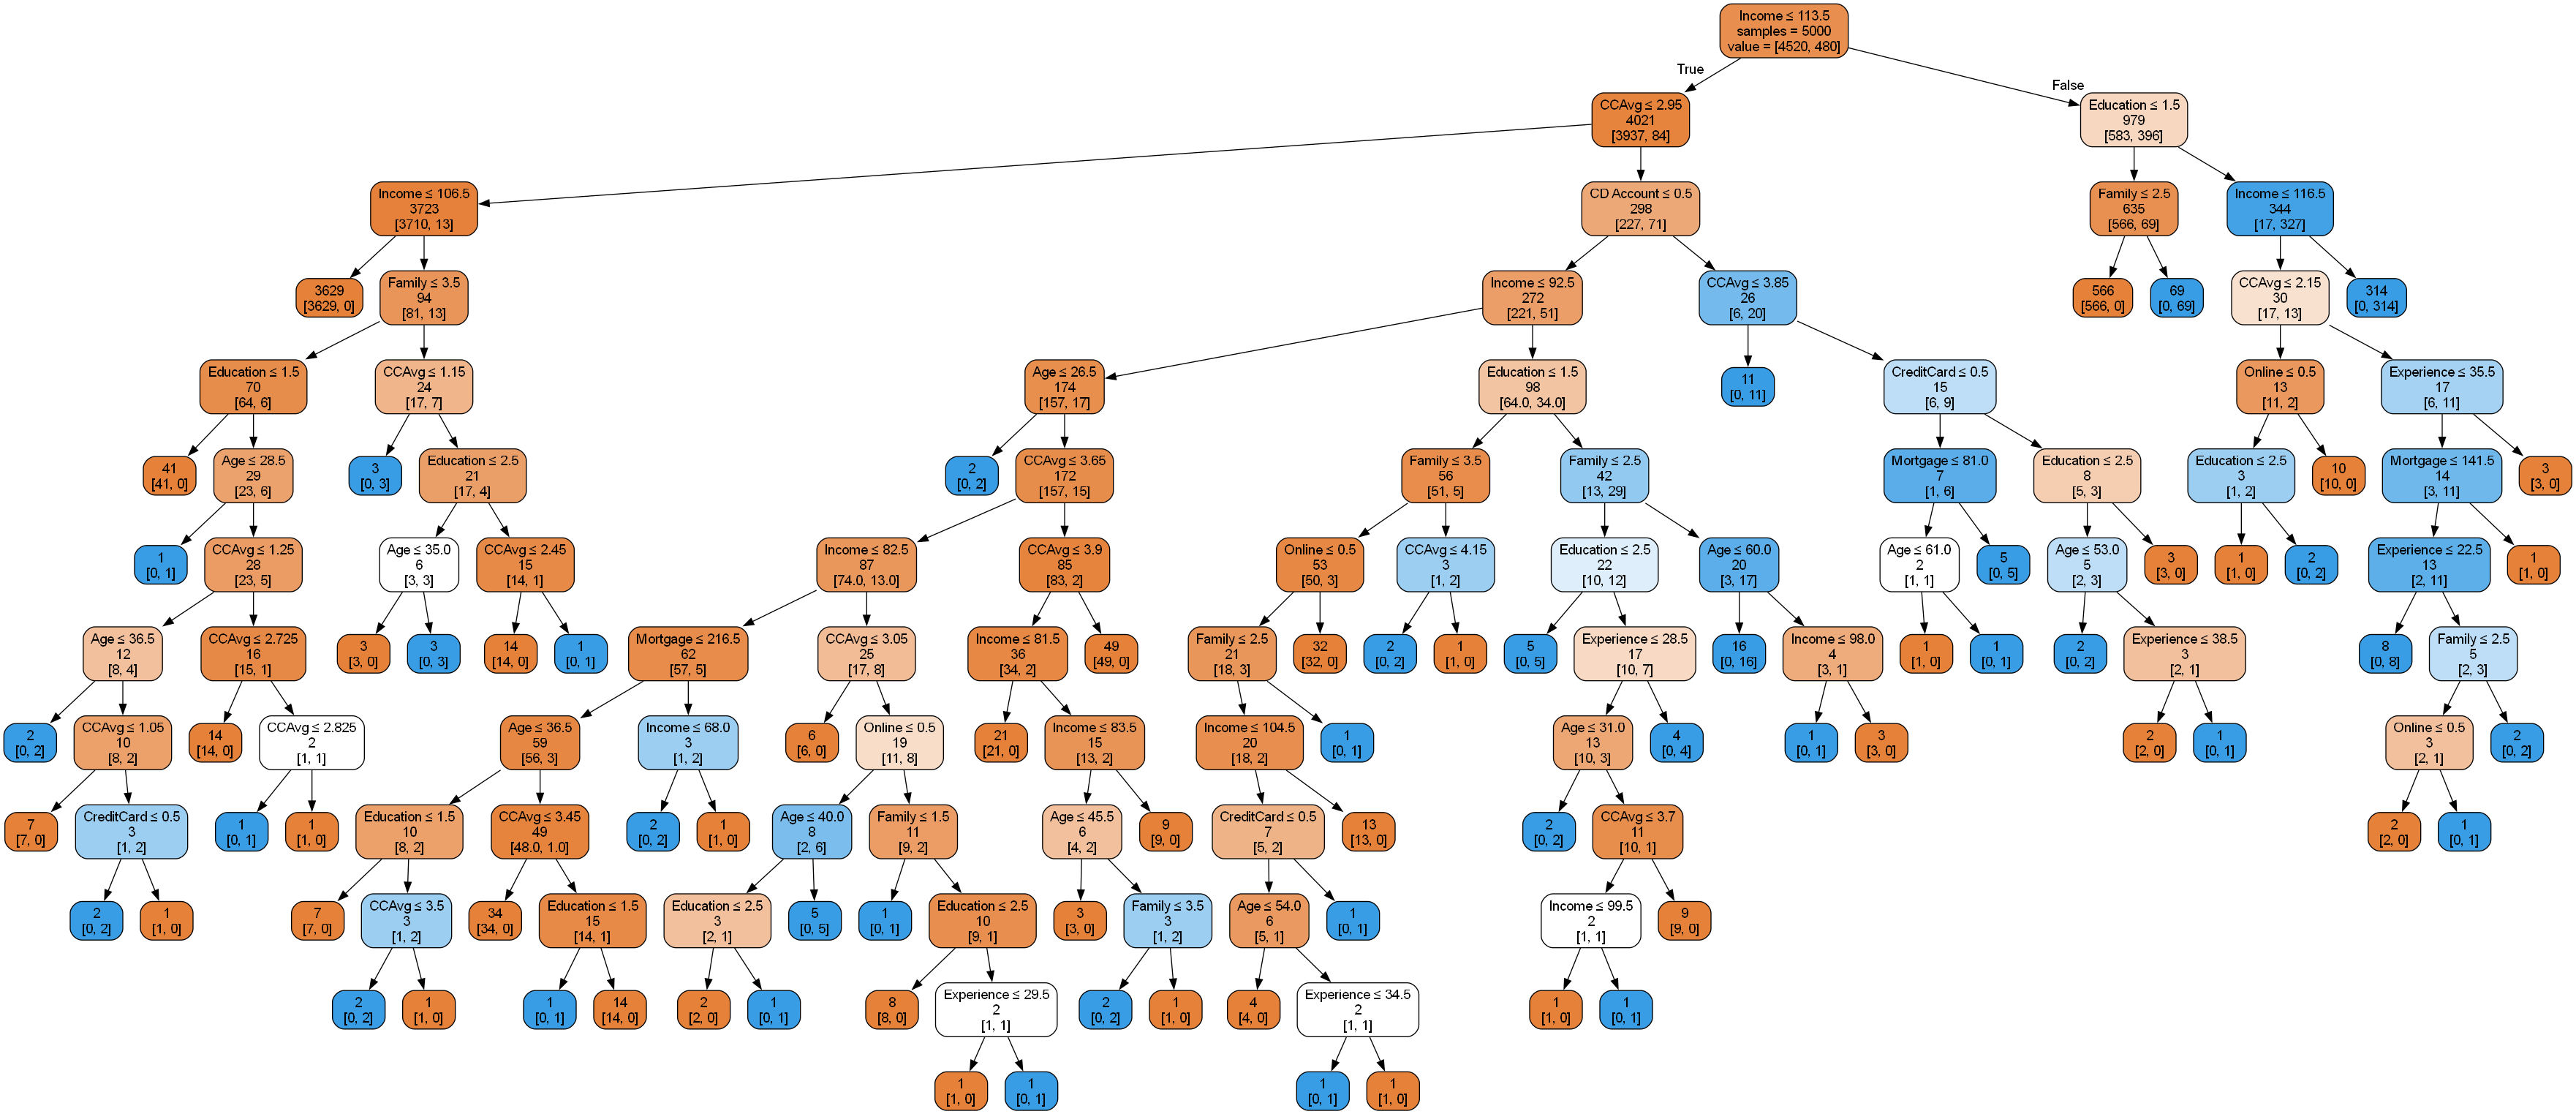